In [1]:
import os
os.getcwd() 

'/Users/izapreev/Projects/ML-PT'

In [2]:
# Make sure the source code auto reloads into the kernel
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from src.utils.logger import logger

In [4]:
from src.utils.file_utils import load_numpy_zc

# Load the features file for further use
file_name = os.path.join('.', 'data', 'X.npz')
X, = load_numpy_zc(file_name, ['X'])

22:51:24 INFO (file_utils:32): Loading compressed numpy z file from: ./data/X.npz
22:51:24 INFO (file_utils:35): File loading and data extraction are done!


In [5]:
%%capture
from src.features.utils import create_2d_projection

# Compute the feature space projection
X_proj = create_2d_projection(X)

In [6]:
from tqdm.notebook import tqdm
from src.model.dbscan.tuning import fit_dbscan_clusters

# According to:
#     https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
# the min_samples sizee for the dataset is to be chosen as:
#     min_samples = 2 * dim ( where dim is the dimensions of your data set)
min_samples = 2 * X.shape[1]
logger.info(f'Choosing the min_samples value: {min_samples}')

# Perform primitive grid search using the S value of the kneed algorithm
s_values = list(range(1, 60, 2))
s_results = []
for s_value in tqdm(s_values, desc=f'Computing number of clusters'):
    s_results.append(fit_dbscan_clusters(X, min_samples, s_value))

22:53:32 INFO (548879672:9): Choosing the min_samples value: 18


Computing number of clusters:   0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Number of clusters')

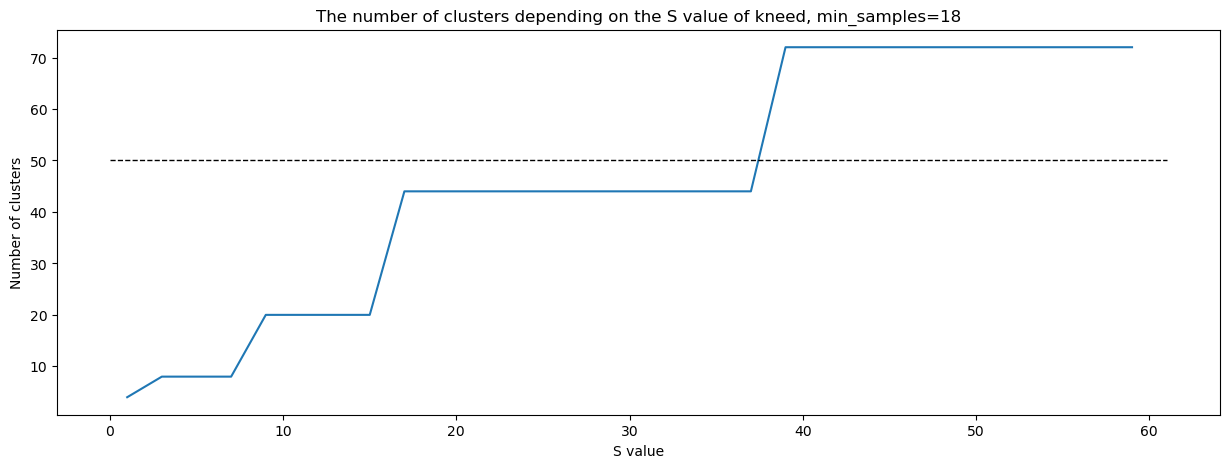

In [7]:
# Plot the resulting data number of clusters depending on the S value for finding the knee/elbow point
# Note that the task claims there can be at most 50 attack classes
fig, ax = plt.subplots(figsize=(15, 5))
label_counts = [len(data['cluster_labels']) for data in s_results]
_ = plt.plot(s_values, label_counts)
plt.plot([0, 61], [50, 50], 'k--', lw=1)
plt.title(f'The number of clusters depending on the S value of kneed, min_samples={min_samples}')
ax.set_xlabel('S value')
ax.set_ylabel('Number of clusters')

In [8]:
from src.model.dbscan.tuning import visualize_elbow_eps_value

# Plot cluster sizes for specified S values
def plot_cluster_sizes_for_s(s_values, s_results, s_value):
    fig, ax = plt.subplots(figsize=(15, 3))
    data = s_results[s_values.index(s_value)]
    cluster_labels = data['cluster_labels']
    cluster_sizes = data['cluster_sizes']
    _ = plt.bar(x = cluster_labels, height = cluster_sizes)
    plt.title(f'Cluster sizes for S: {s_value}, num clusters: {len(cluster_labels)}')
    ax.set_xlabel('Cluster id')
    ax.set_ylabel('Cluster size')
    
    # Visualize the elbow curve
    visualize_elbow_eps_value(**data['elbow'], title=f'Elbow detection for S: {s_value}')
    
    return data

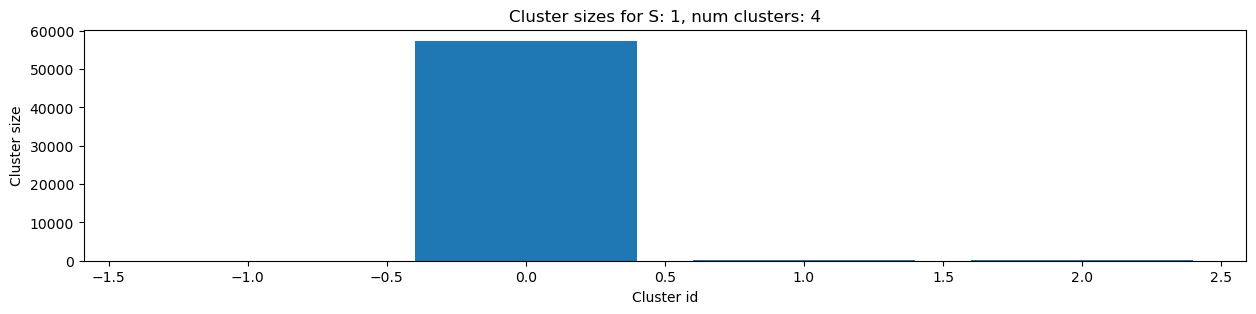

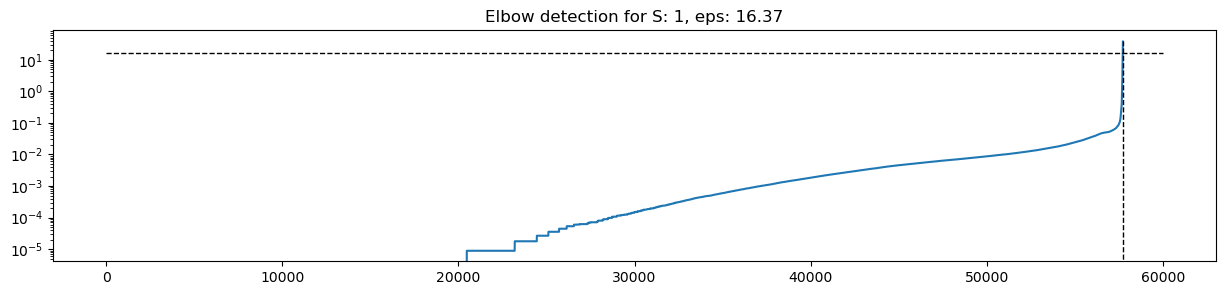

In [12]:
# Let us check on the being and end constant cluster size ranges
data_1 = plot_cluster_sizes_for_s(s_values, s_results, 1)

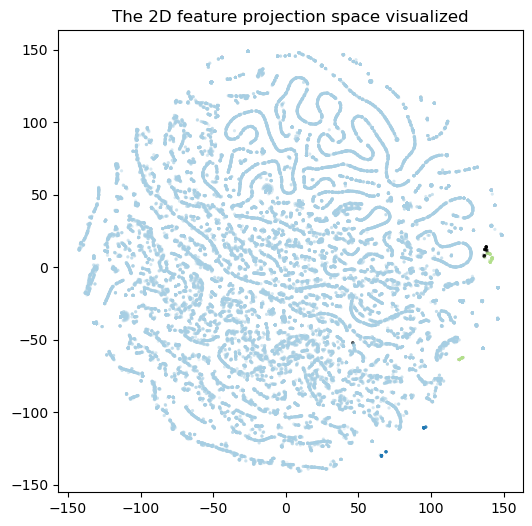

In [27]:
from src.features.utils import plot_2d_feature_space_clusters

# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_1['clusterer'])

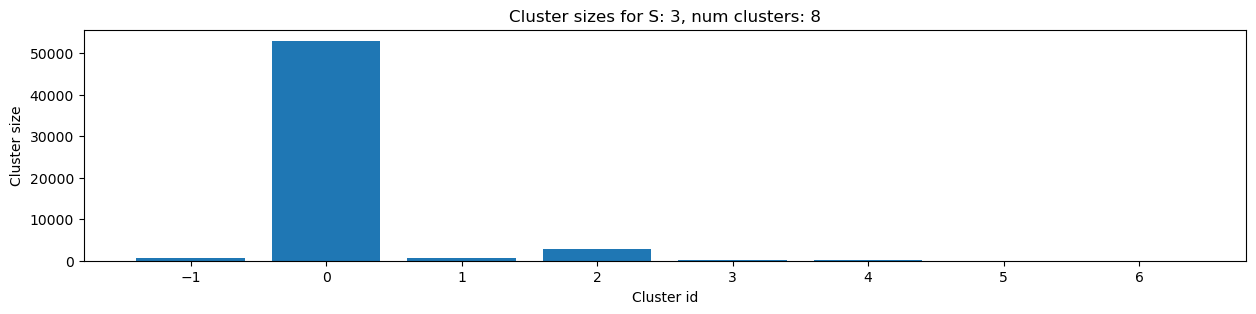

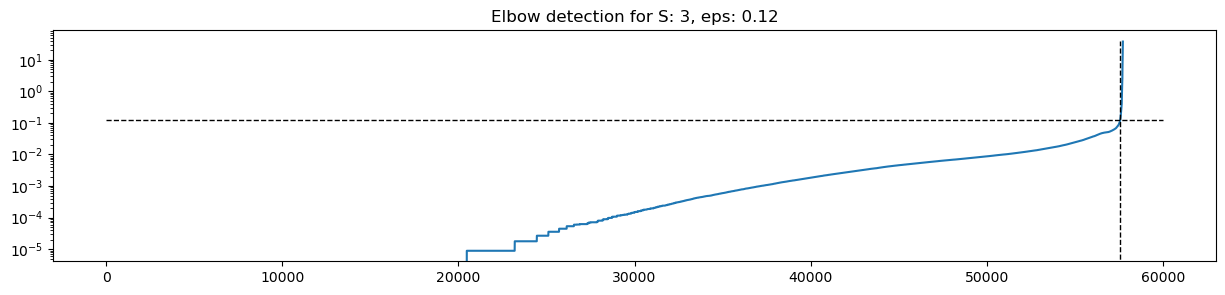

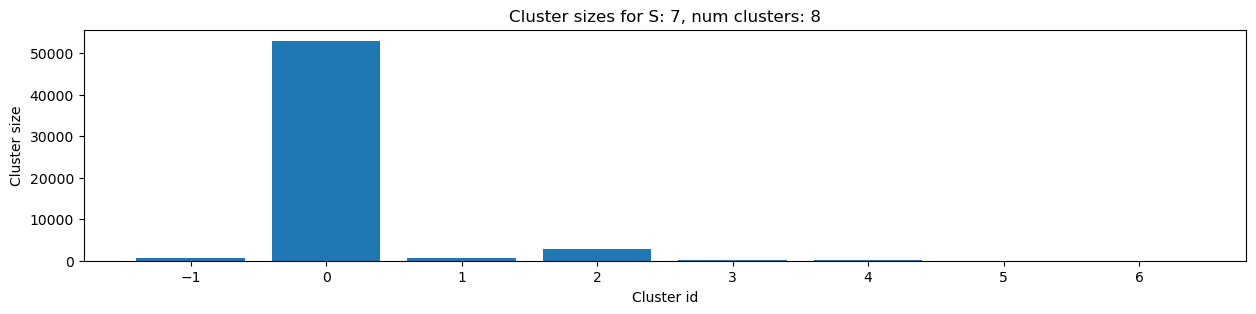

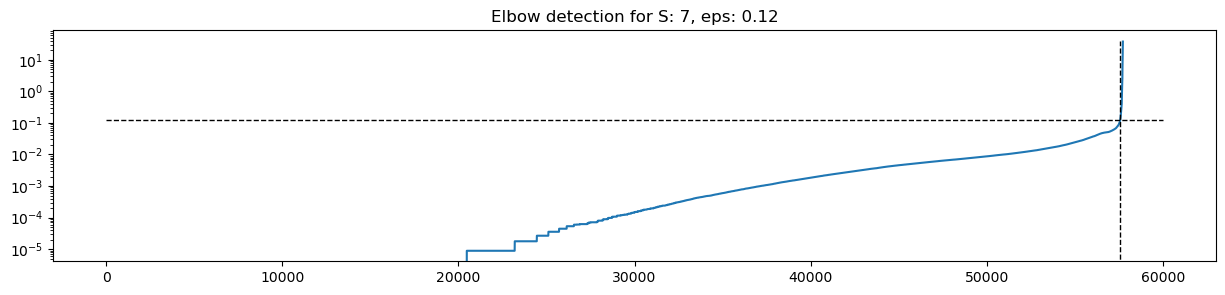

In [14]:
# Let us check on the being and end constant cluster size ranges
data_3 = plot_cluster_sizes_for_s(s_values, s_results, 3)
data_7 = plot_cluster_sizes_for_s(s_values, s_results, 7)

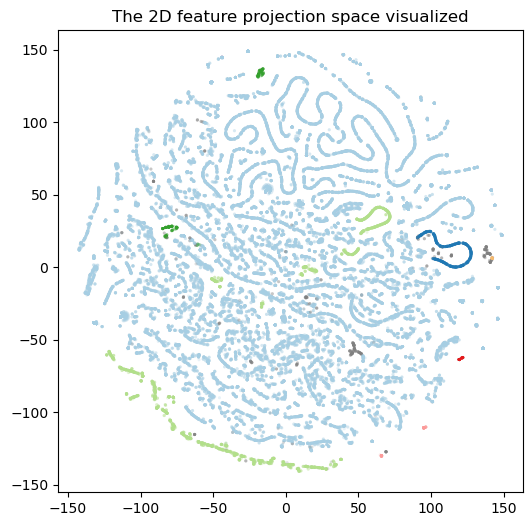

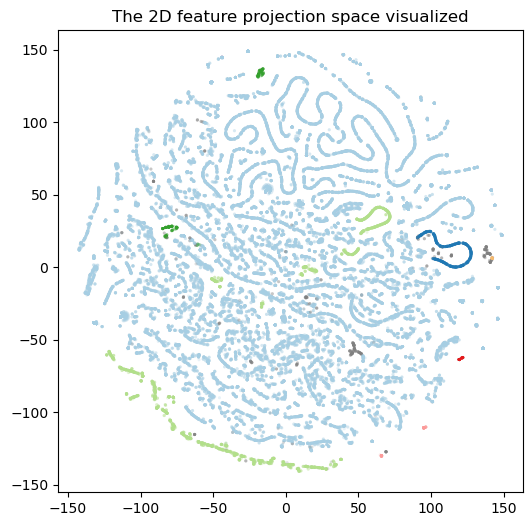

In [15]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_3['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_7['clusterer'])

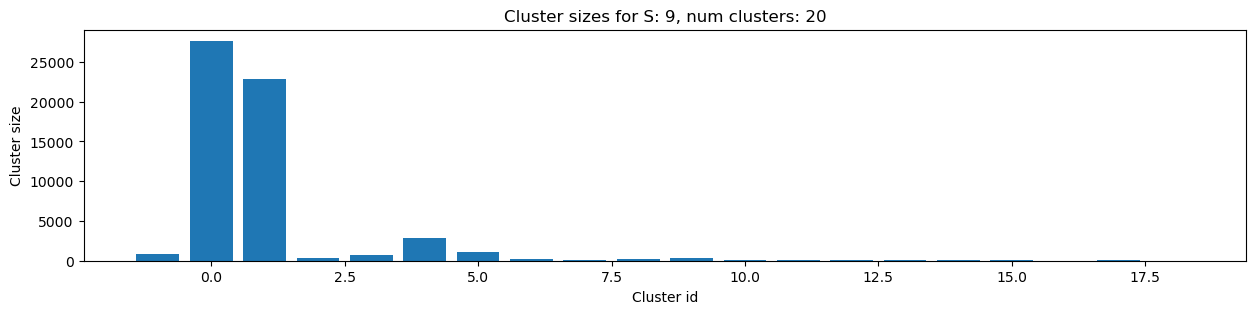

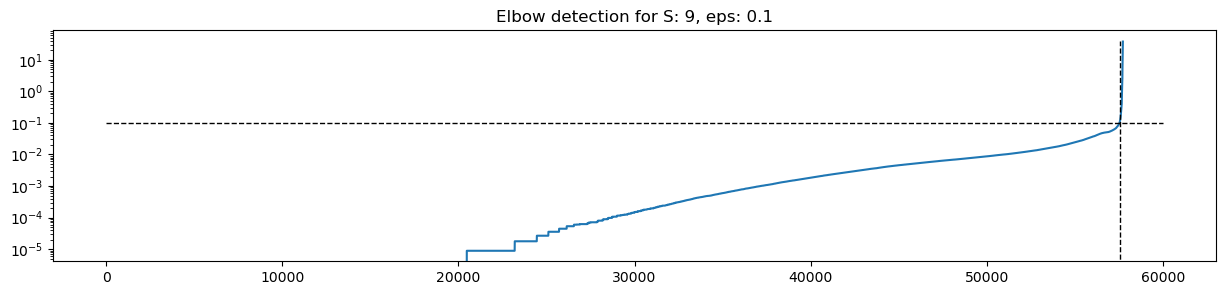

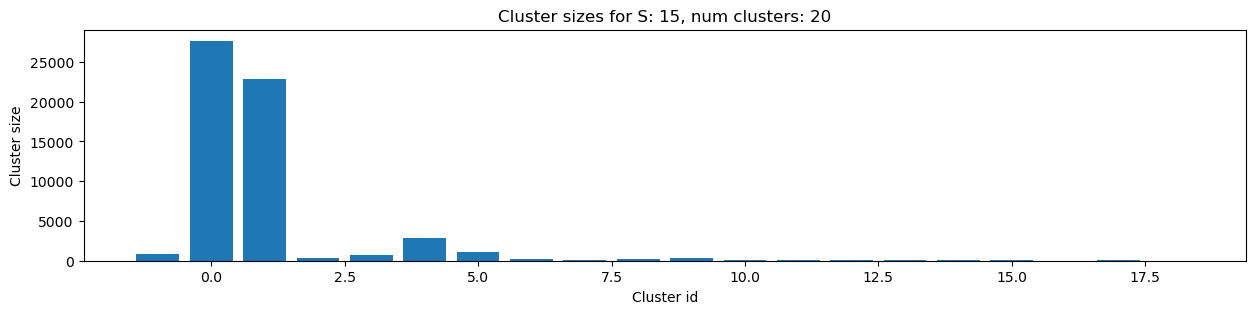

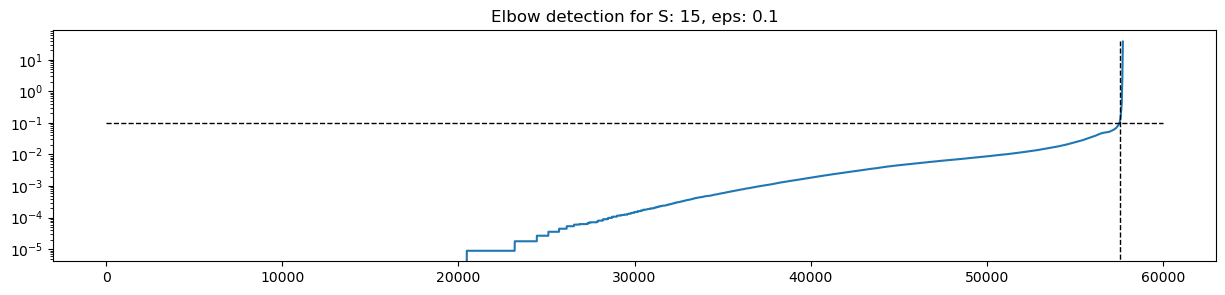

In [20]:
# Let us check on the being and end constant cluster size ranges
data_9 = plot_cluster_sizes_for_s(s_values, s_results, 9)
data_15 = plot_cluster_sizes_for_s(s_values, s_results, 15)

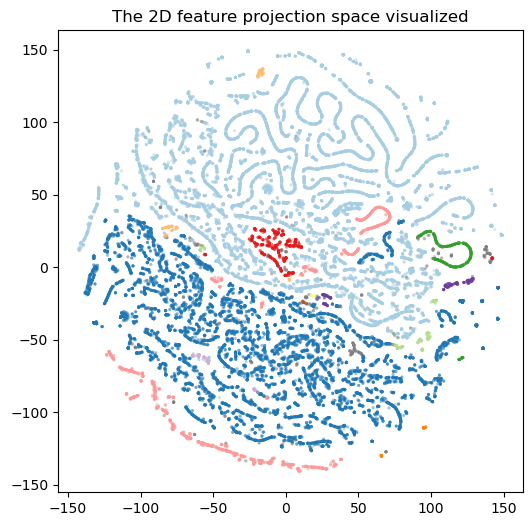

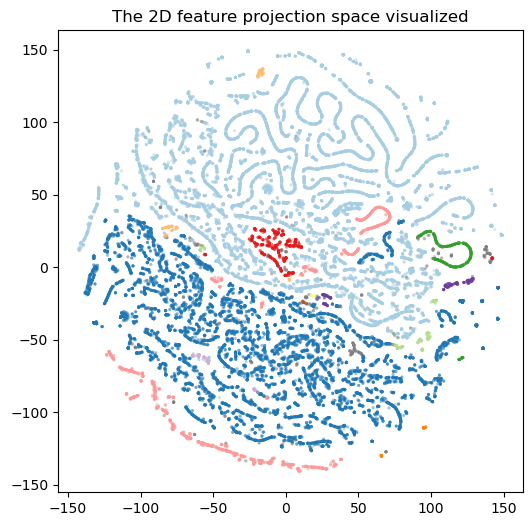

In [22]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_9['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_15['clusterer'])

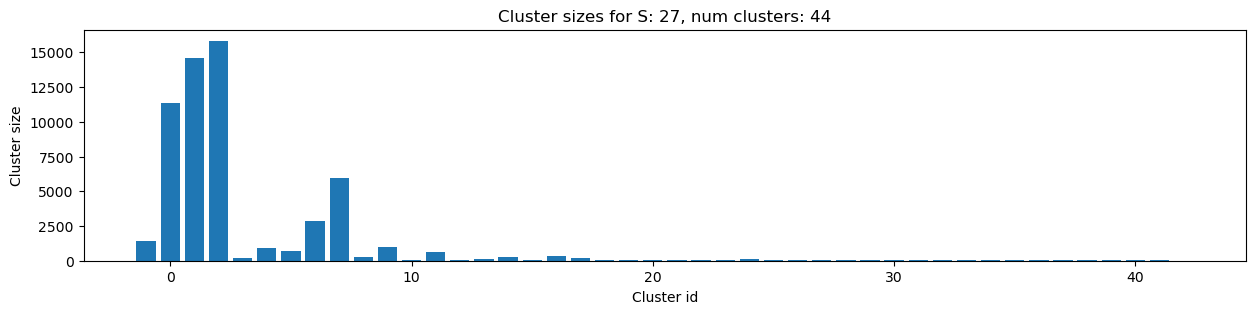

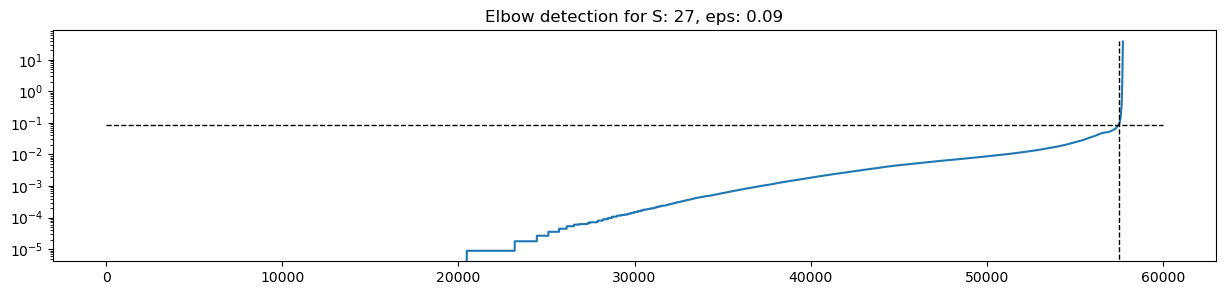

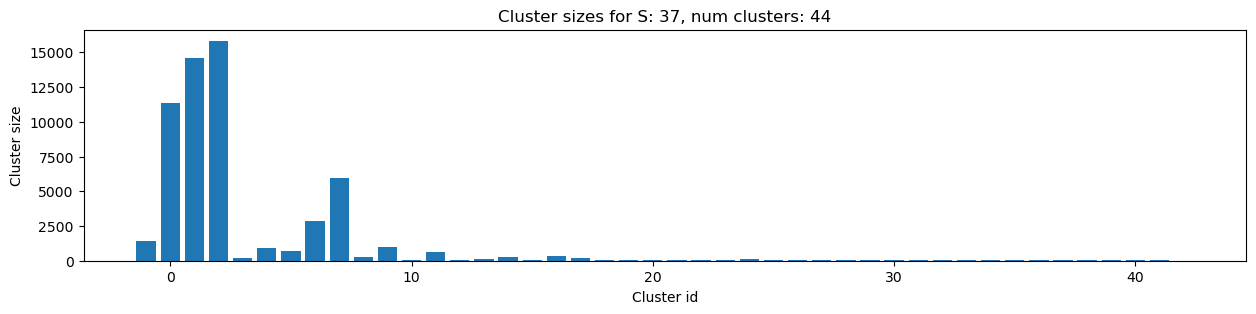

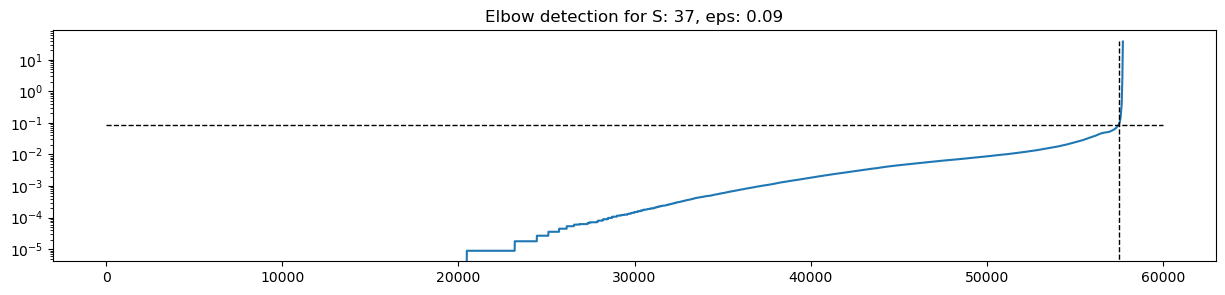

In [23]:
# Let us check on the being and end constant cluster size ranges
data_27 = plot_cluster_sizes_for_s(s_values, s_results, 27)
data_37 = plot_cluster_sizes_for_s(s_values, s_results, 37)

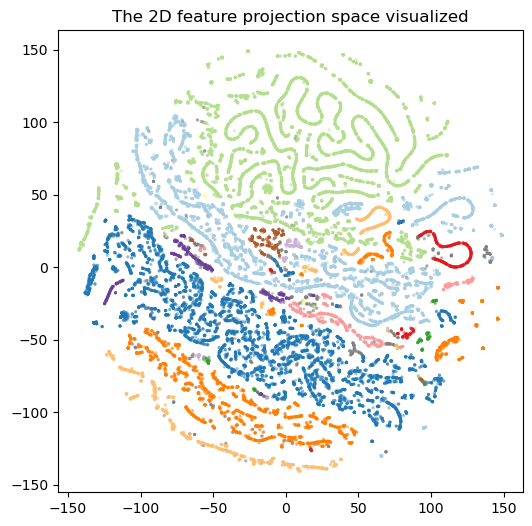

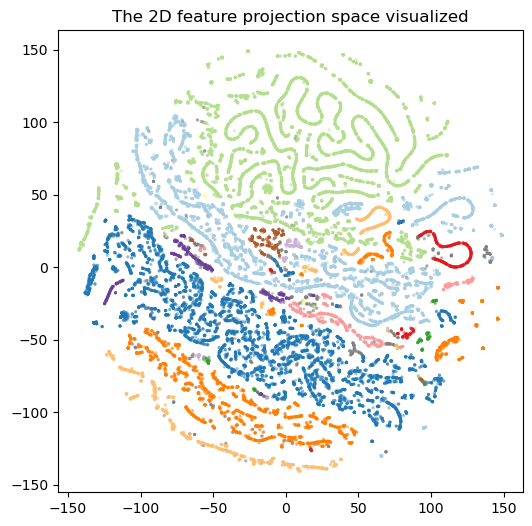

In [24]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_27['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_37['clusterer'])

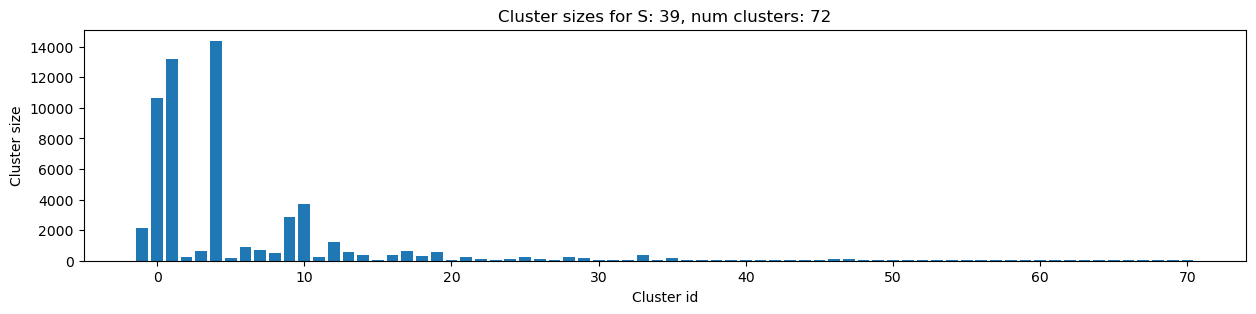

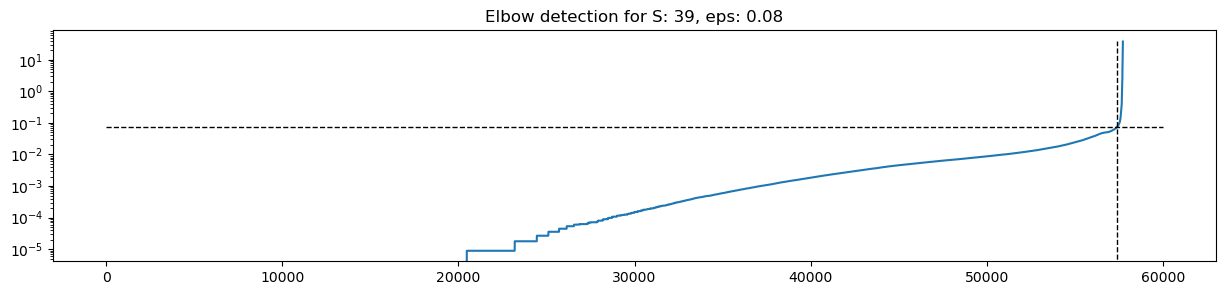

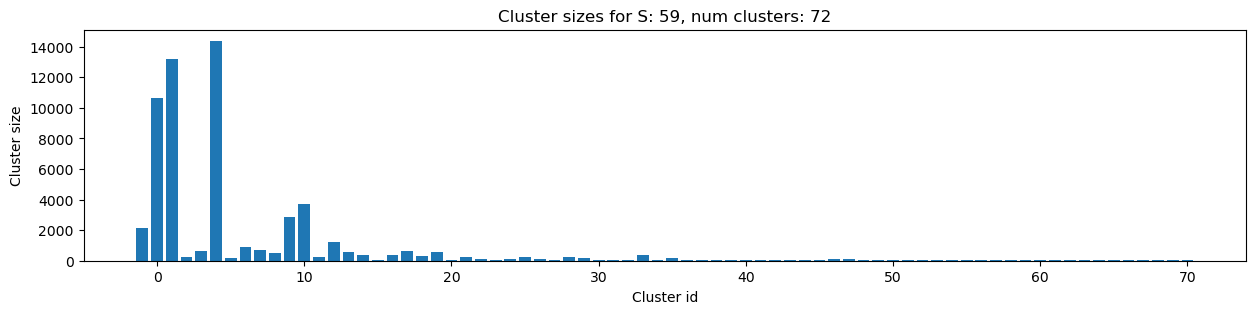

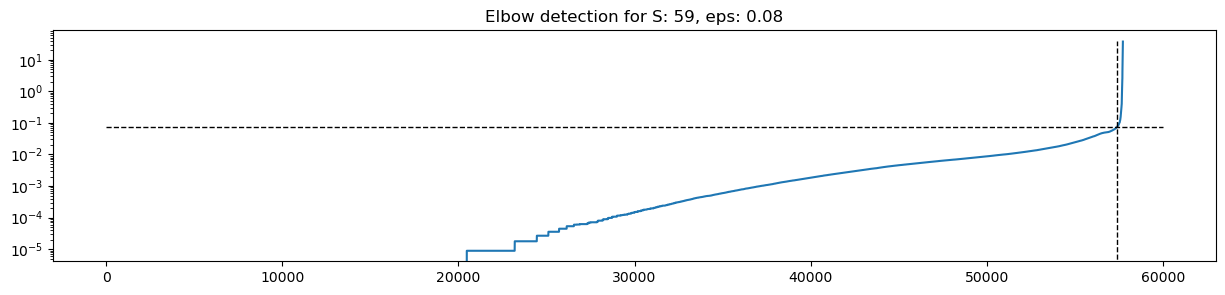

In [25]:
# Let us check on the being and end constant cluster size ranges
data_39 = plot_cluster_sizes_for_s(s_values, s_results, 39)
data_59 = plot_cluster_sizes_for_s(s_values, s_results, 59)

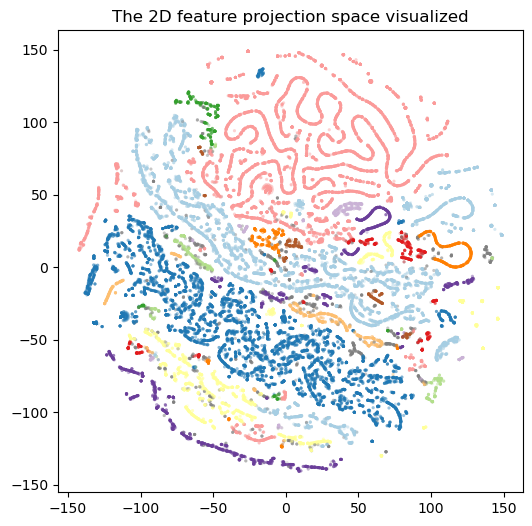

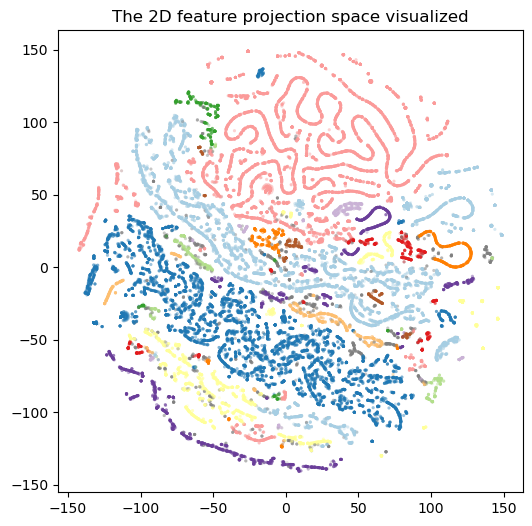

In [26]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_39['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_59['clusterer'])

In [ ]:
#############################################################################
# Summary of observations:
#     From the plots above the S=1 is the value for which we have the one dominating class
#         
#
#     Conclusion: 
#        
#############################################################################

In [ ]:
# TODO: Store the resulting clusters for the selected S value as the y vector for the subsequent classifier training